CLIM 680 Climate Data

Assignment 1 Part B: Making Maps with Cartopy

Dataset: Daily Soil Moisture from ESA Climate Change Initiative (CCI) SM v06.1 (Temporal Resolution: 2011-2020, Spatial Resolution: 0.25°, Case study: Global)

In [8]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [9]:
path = '/scratch/ntavakol/ntavakol/CCI_Final/CCI/'
fname = "ESACCI.nc"
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:         (time: 3653, lon: 1440, lat: 720)
Coordinates:
  * time            (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon             (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * lat             (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
Data variables:
    sm              (time, lat, lon) float32 ...
    sm_uncertainty  (time, lat, lon) float32 ...
    flag            (time, lat, lon) float32 ...
    freqbandID      (time, lat, lon) float32 ...
    dnflag          (time, lat, lon) float32 ...
    mode            (time, lat, lon) float32 ...
    sensor          (time, lat, lon) float32 ...
    t0              (time, lat, lon) datetime64[ns] ...
Attributes: (12/44)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.7
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  Technical University of Vienna (AUT); Vande...
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lat_resolution:    0.25 degree
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start_product:  19781101T000000Z
    time_coverage_end_product:    20201231T235959Z
    CDO:                          Climate Data Operators version 1.9.10 (http...

In [10]:
ds_mean=ds.mean(dim='time')

Plotting Gridded Data

''

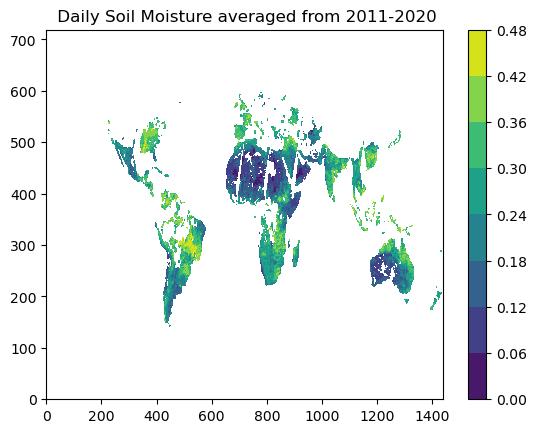

In [11]:
con = plt.contourf(ds['sm'][0,-1::-1,:])

# Add colorbar
plt.colorbar()

# Add title
plt.title(' Daily Soil Moisture averaged from 2011-2020')
;

Plot with a map use PlateCarree as a map projection

''

/home/ntavakol/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


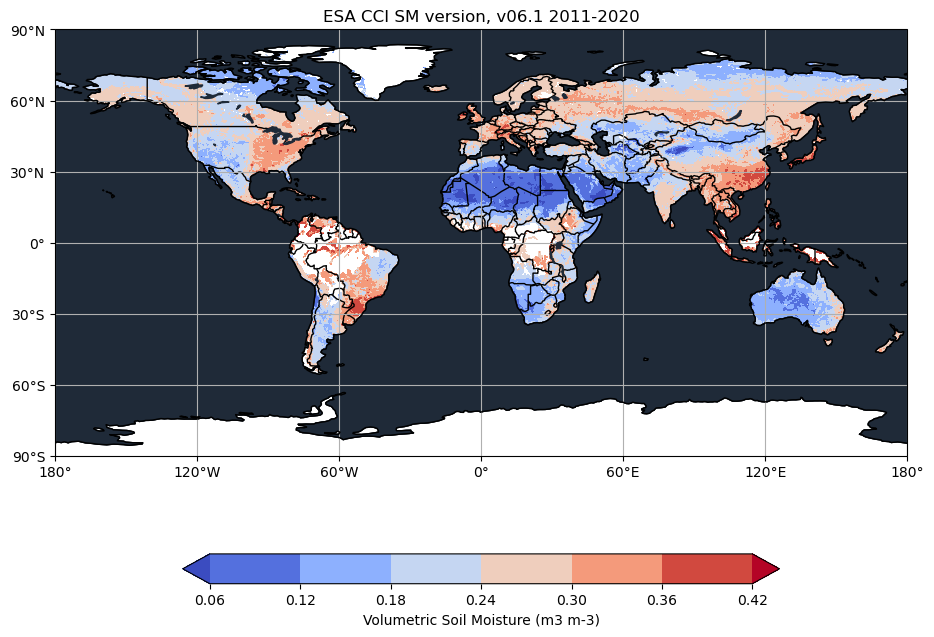

In [12]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['sm']
data, lons = add_cyclic_point(data, coord=ds['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Volumetric Soil Moisture (m3 m-3)')

# Add title
plt.title('ESA CCI SM version, v06.1 2011-2020')
;

Plot with a map use Robinson as a map projection

''

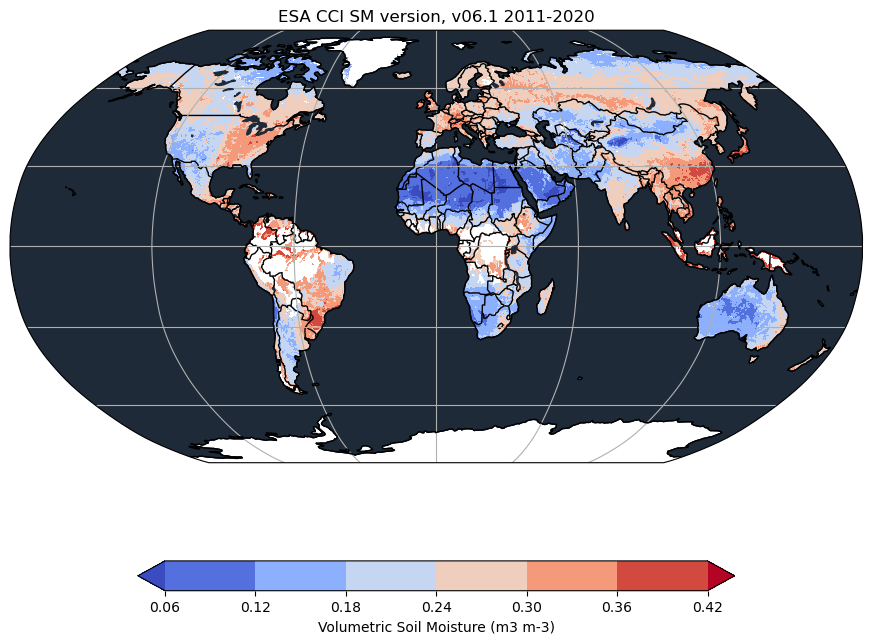

In [13]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean['sm']
data, lons = add_cyclic_point(data, coord=ds['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Volumetric Soil Moisture (m3 m-3)')

# Add title
plt.title('ESA CCI SM version, v06.1 2011-2020')
;